# Cvičení 3 - Vybraná rozdělení diskrétní náhodné veličiny
## Michal Béreš, Martina Litschmannová, Adéla Vrtková
---

# Přehled typů R-kových funkcí (prefix ve jménech funkcí)
### Pravděpodobnostní funkce
- začíná písmenkem **d**: $p = P(X = x)$: p = d...(x, ...)

### Kumulativní pravděpodobnostní (Distribuční funkce)
- začíná písmenkem **p**: $p = P(X \leq x)$: p = p...(x, ...)
- pozor Kumulativní pravděpodobnostní je s alternativní definicí $P(X \leq t)$
- pro naši distribuční funkci $F(t) = P(X<t)$: F(t) = p...(t - 1, ...)

### Kvantilová funkce
- začíná písmenkem **q**:  $p \geq P(X \leq x)$: x = q...(p, ...)
- hledá nejmenší $x$ pro které je $P(X \leq x)$ větší než $p$
---

# Přehled rozdělení (sufix ve jménech funkcí)
### Binomické (Alternativní) rozdělení: $$X \sim Bi(n, π),X \sim A(π) = Bi(1, π)$$
- počet úspěchů v $n$ Bernoulliho pokusech (případně pro jeden pokus v případě Alternativní)
- každý pokus má šanci na úspěch $π$

$$E(X) = n\pi, \quad D(X) = n\pi(1-\pi)$$

In [8]:
# Pravděpodobnostní funkce P(X = x)
x <- 10 # hodnota, pro níž hledáme p-stní funkci
n <- 21 # rozsah výběru
p <- 0.5 # pravděpodobnost úspěchu
dbinom(x, n, p)


[1] 0.1681881

In [9]:
# Kumulativní pravděpodobnostní funkce P(X <= x)
pbinom(x, n, p)


[1] 0.5

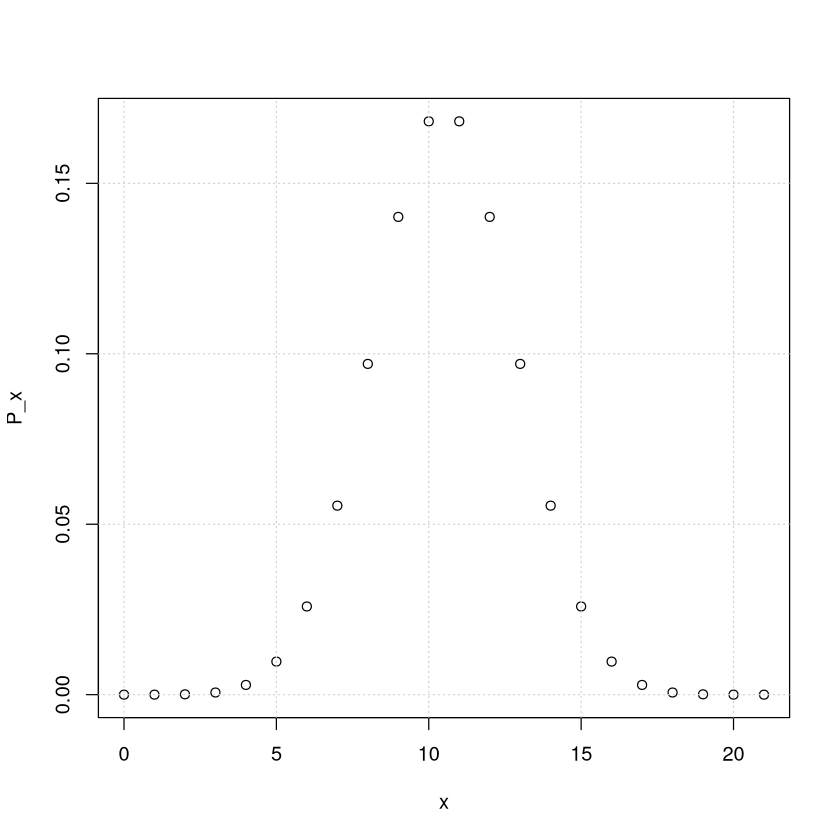

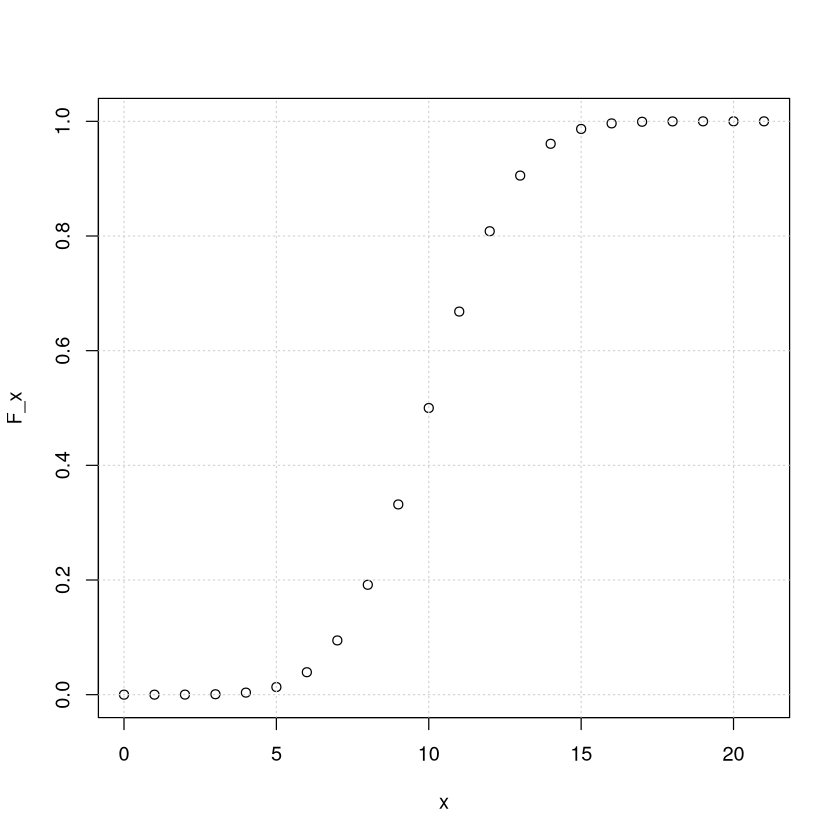

In [10]:
# Funkce podporují vektorové vstupy, tedy dají se jednoduše vykreslit

x <- 0:21 # minimálně 0, maximálně n má kladnou pravděpodobnost

# Pravděpodobnostní funkce
P_x <- dbinom(x, n, p)
plot(x, P_x)
grid()

# Kumulativní pravděpodobnostní funkce
F_x <- pbinom(x, n, p)
plot(x, F_x)
grid()


### Hypergeometrické rozdělení: $$X \sim H(N, M, n)$$
- počet úspěchů v $n$ závislých pokusech
    - závislost typu: $N$ objektů, z toho $M$ objektů se zadanou vlastností a výběr velikosti $n$
    - **při výběru nevracíme zpět - pravděpodobnost výběru objektu s danou vlastností se mění s každým dalším vybraným objektem**
- **R funkce bere jako parametry** ***hyper(k, M, N - M, n)***
    - k je počet úspěchů pro které počítáme pravděpodobnost,
    - M je počet objektů se zadanou vlastností,
    - N-M je počet objektů bez zadané vlastnosti,
    - n je ceklová velikost výběru.

In [11]:
# Pravděpodobnostní funkce P(X = x)
x <- 3 # hodnota, pro níž hledáme p-stní funkci
N <- 20 # celkový počet objektů
M <- 5 # z toho se zadanou vlastností
n <- 10 # velikost výběru
dhyper(x, M, N - M, n)


[1] 0.3482972

In [12]:
# Kumulativní pravděpodobnostní funkce P(X <= x)
phyper(x, M, N - M, n)


[1] 0.8482972

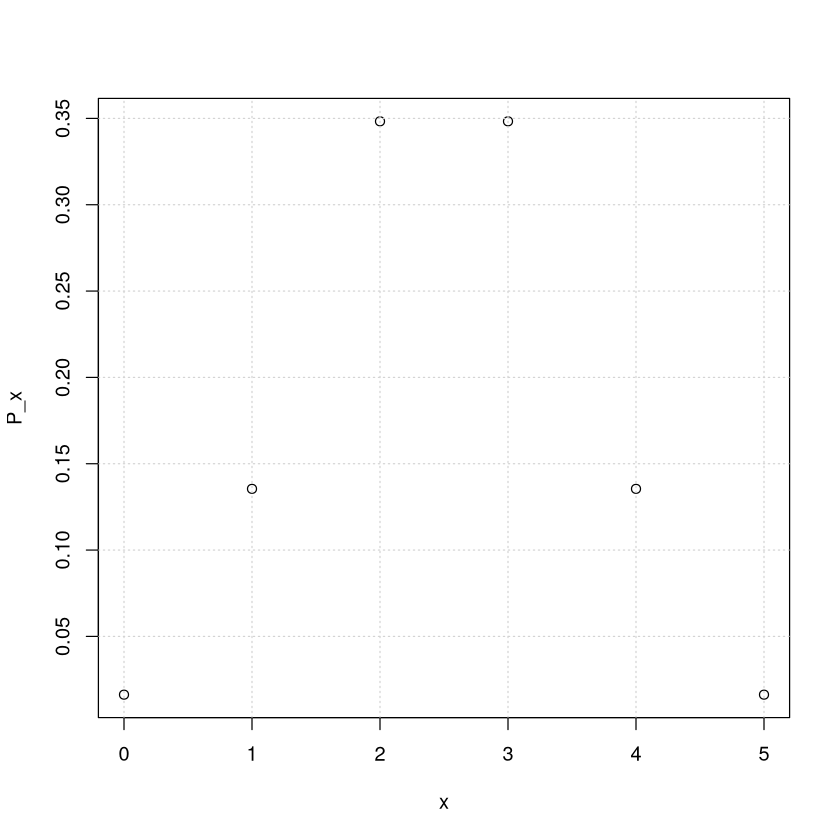

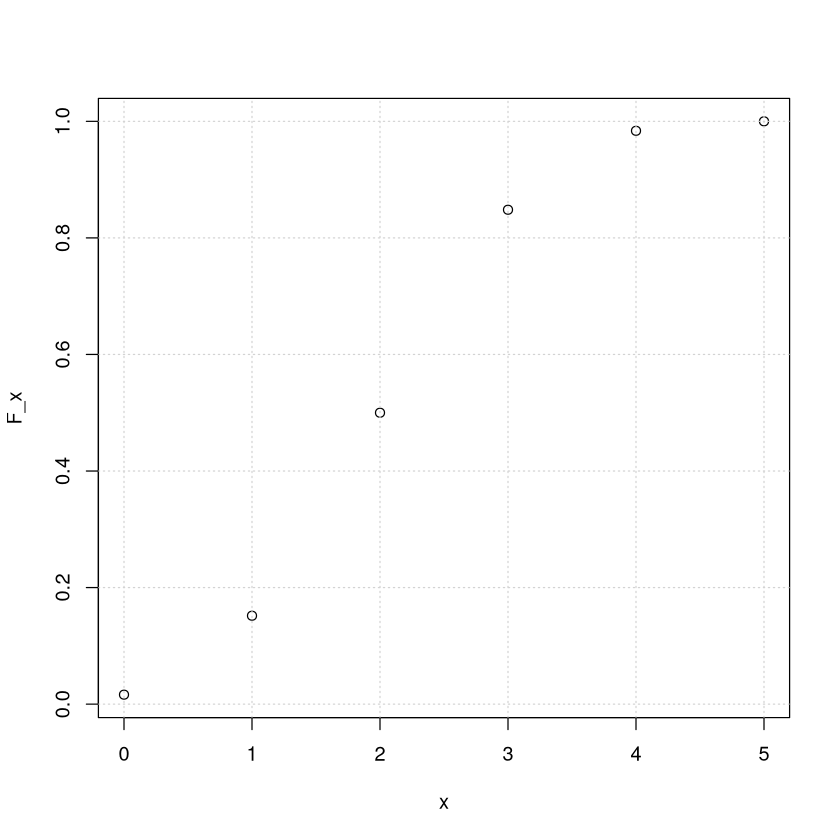

In [13]:
# opět si můžeme vykreslit

# Pravděpodobnostní funkce
x <- 0:5 # minimálně 0, maximálně n nebo M má kladnou pravd.
P_x <- dhyper(x, M, N - M, n)
plot(x, P_x)
grid()

# Kumulativní pravděpodobnostní funkce
F_x <- phyper(x, M, N - M, n)
plot(x, F_x)
grid()


### Negativně binomické (Geometrické) rozdělení: $$X \sim NB(k, \pi), X \sim Ge(\pi) = NB(1, \pi)$$
- počet pokusů do $k$-tého úspěchu (včetně)
- každý pokus má šanci na úspěch $π$
- **Negativně binomická NV je v Rku definována jako počet neúspěchů před k-tým úspěchem**
 - proto jako první parametr budeme posílat x - k

$$E(X) = \frac{k}{\pi}, \quad D(X) = \frac{k(1-\pi)}{\pi^2}$$

In [14]:
# Pravděpodobnostní funkce P(X = x)
x <- 15 # počet pokusů pro který hledáme pravd. fci
k <- 5 # požadovaný počet úspěchů
p <- 0.3 # pravd. jednotlivých pokusů
# pozor první argument musí být počet neúspěchů
dnbinom(x - k, k, p)


[1] 0.06871013

In [15]:
# Kumulativní pravděpodobnostní funkce P(X <= x)
pnbinom(x - k, k, p)


[1] 0.4845089

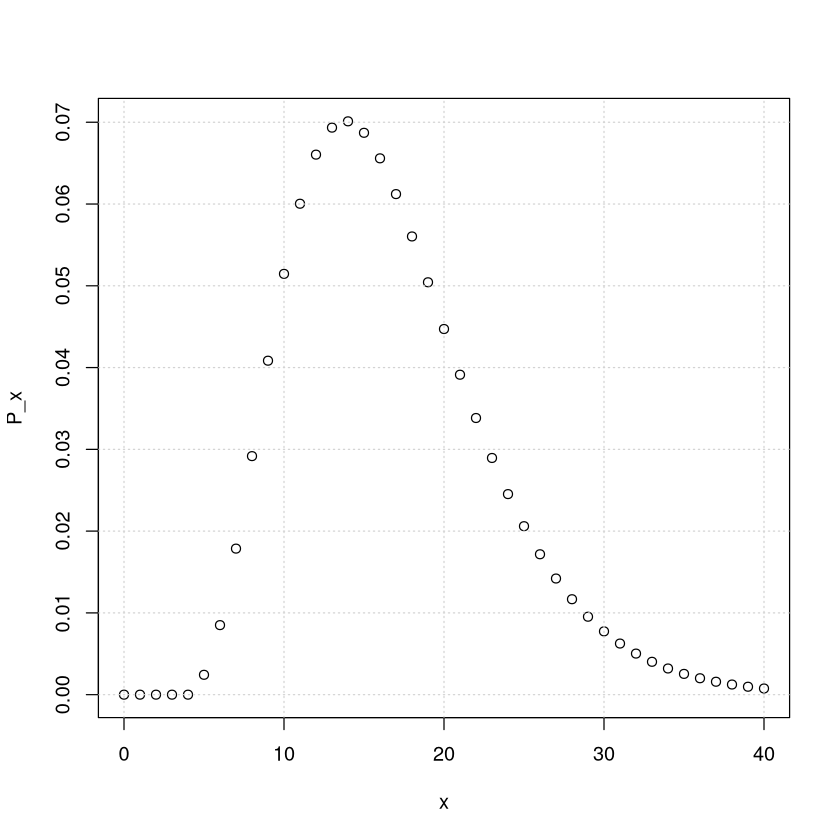

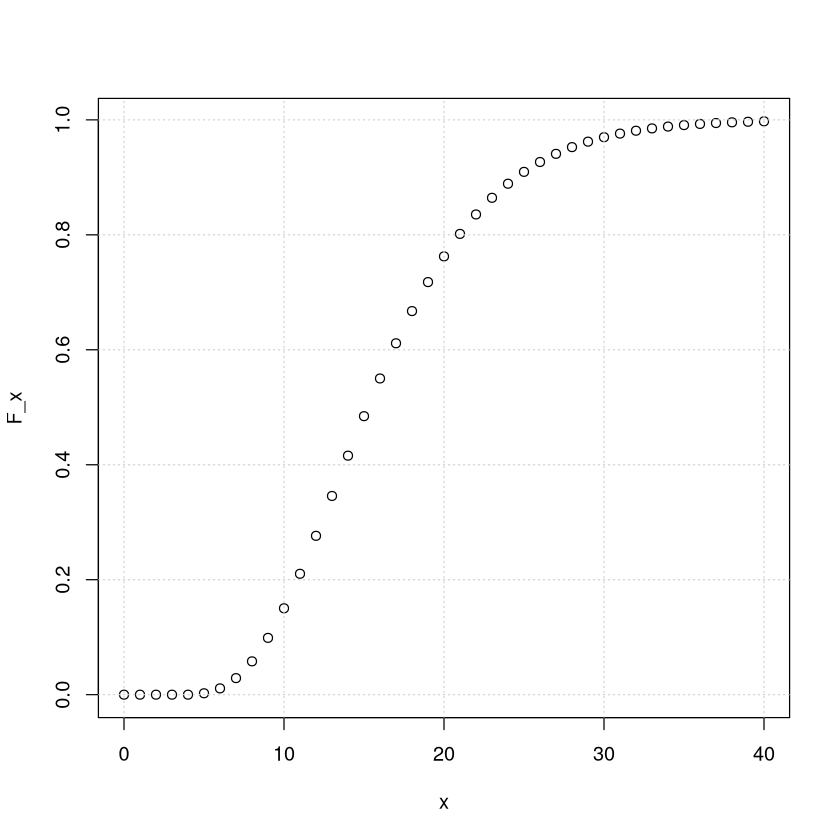

In [16]:
# vykreslíme si pravděpodobnostní funkci
x <- 0:40 # minimálně k, maximum neomezeno
P_x <- dnbinom(x - k, k, p)
plot(x, P_x)
grid()
# hodnoty 0,1,2,3,4 mají P(x)=0

# vykreslíme si Kumulativní pravděpodobnostní funkci
F_x <- pnbinom(x - k, k, p)
plot(x, F_x)
grid()


### Poissonovo rozdělení: $$X \sim Po(\lambda t)$$
- počet událostí v Poissonově procesu v uzavřené oblasti (v čase, na ploše, v objemu)
- s hustotou výskytu $λ$ 
- v čase/ploše/objemu velikosti $t$

$$E(X) = \lambda t, \quad D(X) = \lambda t$$

In [17]:
# Pravděpodobnostní funkce P(X = x)
x <- 9 # počet pokusů pro který hledáme pravd. fci
lambda <- 5 # hustota výskytu
t <- 2 # pravd. jednotlivých pokusů
lt <- lambda * t
dpois(x, lt)


[1] 0.12511

In [18]:
# Kumulativní pravděpodobnostní funkce P(X <= x)
ppois(x, lt)


[1] 0.4579297

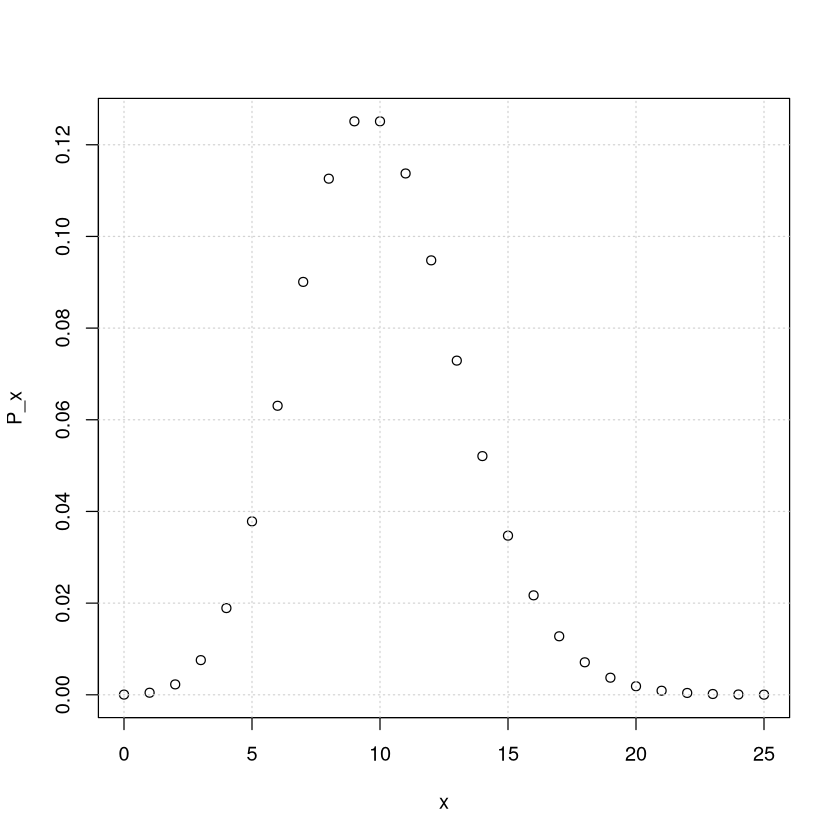

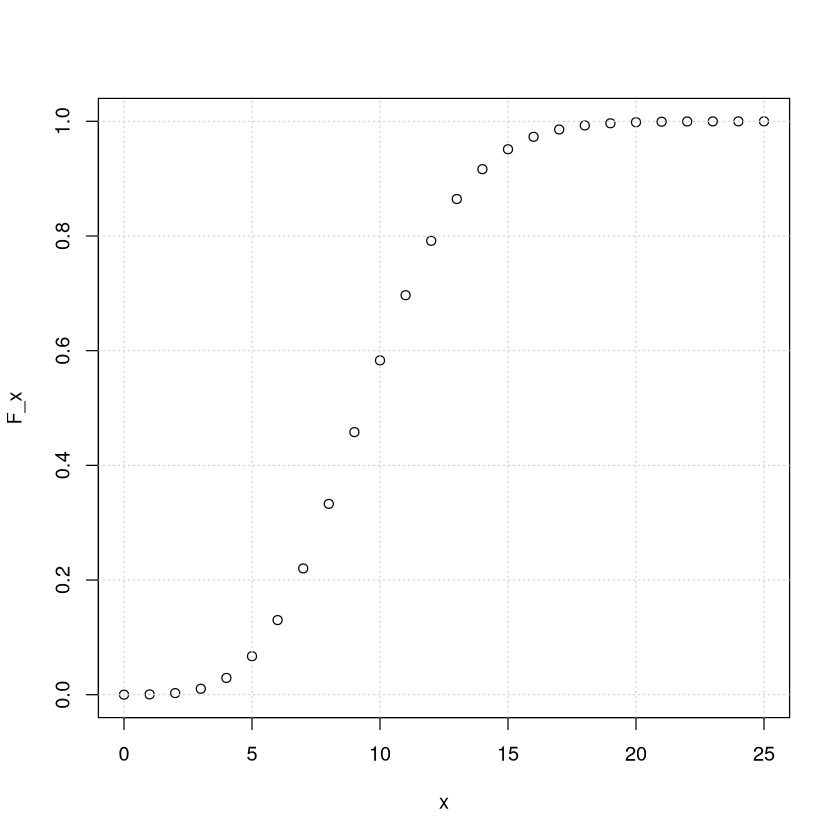

In [19]:
# vykreslíme si pravděpodobnostní funkci
x <- 0:25 # minimálně 0, maximum neomezeno
P_x <- dpois(x, lt)
plot(x, P_x)
grid()

# vykreslíme si Kumulativní pravděpodobnostní funkci
F_x <- ppois(x, lt)
plot(x, F_x)
grid()

---
# Úlohy k procvičení
---
## Příklad 1.
Bridž se hraje s 52 bridžovými kartami, které se rozdají mezi 4 hráče. Vždy 2 hráči hrají spolu. Při rozdávání (13 karet) jste dostali do rukou 2 esa. Jaká je pravděpodobnost, že váš partner bude mít zbývající dvě esa?

In [20]:
# X ... počet es mezi 13 kartami
# X ~ H(N = 39, M = 2, n = 13)
# P(X = 2)
M <- 2
N <- 39 # 52-13
n <- 13
# výpočet
dhyper(2, M, N - M, n) # což je dhyper(2,2,37,13)


[1] 0.1052632

## Příklad 2.
Pokusy se zjistilo, že radioaktivní látka vyzařuje během 7,5 s průměrně 3,87 α-částice. Určete pravděpodobnost toho, že za 1 sekundu vyzáří tato látka alespoň jednu α-částici.

In [21]:
# X ... počet vyzářených alfa částic během 1 s
# X ~ Po(lt = 3.87/7.5)

lambda <- 3.87 / 7.5 # četnost výskytu
t <- 1 # za 1 sekundu
lt <- lambda * t # parametr Poissonova rozdělení

# P(X >= 1) = 1 - P(X < 1) = 1 - (P(X <= 1) - P(X = 1))
1 - (ppois(1, lt) - dpois(1, lt))

[1] 0.4030966

## Příklad 3.
Kamarád vás pošle do sklepa, abyste donesl(a) 4 lahvová piva - z toho dvě desítky a dvě dvanáctky. Nevíte, kde rozsvítit, proto vezmete z basy poslepu 4 láhve. S jakou pravděpodobností jste vyhověl(a), víte-li, že v base bylo celkem 10 desítek a 6 dvanáctek?

In [22]:
# X ... počet 10°piv mezi 4 vybranými
# X ~ H(N = 16, M = 10, n = 4)

x <- 2
N <- 16
M <- 10
n <- 4

# P(X = 2)
dhyper(x, M, N - M, n)


[1] 0.3708791

## Příklad 4.
V jednom mililitru určitého dokonale rozmíchaného roztoku se v průměru nachází 15 určitých mikroorganismů. Určete pravděpodobnost, že při náhodném výběru vzorku o objemu 1/2 mililitru bude ve zkumavce méně než 5 těchto mikroorganismu.

In [23]:
# X ... počet mikroorganismů v 0.5 ml roztoku
# X ~ Po(lt = 15/2)

lambda <- 15
t <- 1 / 2
lt <- lambda * t # parametr Poissonova rozd.

# P(X < 5) = P(X <= 5) - P(X = 5)
ppois(5, lt) - dpois(5, lt)


[1] 0.1320619

## Příklad 5.
Na stůl vysypeme 15 mincí. Jaká je pravděpodobnost, že počet mincí ležících lícem nahoře, je od 8 do 15?

In [24]:
# X ... počet mincí, které padnou lícem nahoru z celkového množství 15 mincí
# X ~ Bi(n = 15, p = 0.5)

n <- 15
p <- 0.5

# P(8 <= X <= 15) = P(X <= 15) - P(X < 8) = P(X <= 15) - (P(X <= 8) - P(X = 8))
pbinom(15, n, p) - (pbinom(8, n, p) - dbinom(8, n, p))


[1] 0.5

## Příklad 6.
Pravděpodobnost, že se dovoláme do studia rozhlasové stanice, která právě vyhlásila telefonickou soutěž je 0,08. Jaká je pravděpodobnost, že se dovoláme nejvýše na 4. pokus?

In [25]:
# X ... počet pokusů než se dovoláme do rozhlasového studia
# X ~ NB(k = 1,p = 0.08) nebo G(0.08)

x <- 4
k <- 1
p <- 0.08

# P(X <= 4)
pnbinom(x - k, k, p)


[1] 0.283607

## Příklad 7.
V továrně se vyrobí denně 10 % vadných součástek. Jaká je pravděpodobnost, že vybereme-li třicet součástek z denní produkce, tak nejméně dvě budou vadné?

In [26]:
# X ... počet vadných součástek ze 30 vybraných
# X ~ Bi(n = 30, p = 0.1)

n <- 30
p <- 0.1

# P(X >= 2) = 1 - P(X < 2) = 1 - (P(X <= 2) - P(X = 2))
1 - (pbinom(2, n, p) - dbinom(2, n, p))


[1] 0.816305

## Příklad 8.
Ve skladu je 200 součástek. 10 % z nich je vadných. Jaká je pravděpodobnost, že vybereme-li ze skladu třicet součástek, tak nejméně dvě budou vadné?

In [27]:
# X ... počet vadných součástek ze 30 vybraných z 200
# X ~ H(N = 200, M = 20, n = 30)

N <- 200
M <- 20
n <- 30

# P(X >= 2) = 1 - P(X < 2) = 1 - (P(X <= 2) - P(X = 2))
1 - (phyper(2, M, N - M, n) - dhyper(2, M, N - M, n))


[1] 0.839071

## Příklad 9.
V určité firmě bylo zjištěno, že na 33 % počítačů je nainstalován nějaký nelegální software. Určete pravděpodobnostní a distribuční funkci počtu počítačů s nelegálním softwarem mezi třemi kontrolovanými počítači.

In [28]:
# X ... počet počítačů s nelegálním softwarem ze 3 kontrolovaných
# X ~ Bi(n = 3,p = 0.33)

n <- 3
p <- 0.33

# pravděpodobnostní funkce
x <- 0:3 # všechny možné realizace NV X
P_x <- dbinom(x, n, p) # hodnoty pravděpodobnostní funkce pro x

F_x <- pbinom(x, n, p) - dbinom(x, n, p)

x
P_x

x
F_x


[1] 0 1 2 3

[1] 0.300763 0.444411 0.218889 0.035937

[1] 0 1 2 3

[1] -5.551115e-17  3.007630e-01  7.451740e-01  9.640630e-01

## Příklad 10.
Sportka je loterijní hra, v níž sázející tipuje šest čísel ze čtyřiceti devíti, která očekává, že padnou při budoucím slosování. K účasti ve hře je nutné zvolit alespoň jednu kombinaci 6 čísel (vždy 6 čísel na jeden sloupec) a pomocí křížků tato čísla označit na sázence společnosti Sazka a.s. do sloupců, počínaje sloupcem prvním. Sázející vyhrává v případě, že uhodne alespoň tři čísla z tažené šestice čísel. 

**a)** Jaká je pravděpodobnost, že soutěžící vyhraje v  jednom sloupci.

In [29]:
# Y ... počet uhádnutých čísel v 6 tažených ze 49
# Y ~ H(N = 49, M = 6, n = 6)

N <- 49
M <- 6
n <- 6

# P-st uhádnutí alespoň 3 čísel v jednom sloupci
# P(Y >= 3) = 1 - P(Y < 3) = 1 - (P(Y <= 3) - P(Y = 3))
pp <- 1 - (phyper(3, M, N - M, n) - dhyper(3, M, N - M, n))
pp


[1] 0.01863755

**b)** Jaká je pravděpodobnost, že proto, aby sázející vyhrál, bude muset vyplnit právě tři sloupce.

In [30]:
# X … počet sloupců, které bude muset sázející vyplnit, aby vyhrál
# X ~ NB(k = 1, p = pp)

# a) P(X = 3)
k <- 1
p <- pp

dnbinom(3 - k, k, pp)


[1] 0.0179493

**c)** Jaká je pravděpodobnost, že proto, aby sázející vyhrál, bude muset vyplnit alespoň 5 sloupců.


In [31]:
# b) P(X >= 5) = 1 - P(X < 5) = 1 - (P(X <= 5) - P(X = 5))

1 - (pnbinom(5 - k, k, pp) - dnbinom(5 - k, k, pp))


[1] 0.9275082

**d)** Jaká je pravděpodobnost, že proto, aby sázející vyhrál, bude muset vyplnit méně než 10 sloupců.

In [32]:
# c) P(X < 10) = P(X <= 10) - P(X = 10)
pnbinom(10 - k, k, pp) - dnbinom(10 - k, k, pp)


[1] 0.1557619

**e)** Jaká je pravděpodobnost, že proto, aby sázející vyhrál, bude muset vyplnit více než 5 a nejvýše 10 sloupců?

In [33]:
# P(5 < X <= 10) = P(X <= 10) - P(X <= 5)
pnbinom(10 - k, k, pp) - pnbinom(5 - k, k, pp)


[1] 0.08171814

**f)** Jaký je průměrný počet sloupců které musí hráž vyplnit dokud nevyhraje?

In [34]:
# X ~ NB(k = 1, p = pp)
# chceme spočítat E(X)
# podle vzorce E(X) = k/pi
1 / pp

[1] 53.65514

## Příklad 11.
Pravděpodobnost, že hodíme 6 na 6stěnné kostce je 1/6. Hážeme tak dlouho, než hodíme šestku 10 krát. 

**a)** Jaká je střední hodnota počtu hodů.

In [35]:
# X … hodů kostkou než hodíme 10 šestek
# X ~ NB(k = 10, p = 1/6)

k <- 10
p <- 1 / 6

E_X <- k / p
E_X


[1] 60

**b)**
S kolika hody nejméně musíme počítat, pokud chceme, aby pradvěpodobnost, že se nám podaří naházet 10 šestek, byla alespoň 70%.

In [36]:
# P(X <= k) >= 0.7
qnbinom(0.7, k, p) + k


[1] 68